# **Climate Change Kaggle Challenge**

**Libary** **Imports**

In [132]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import lightgbm as lgb


from wordcloud import WordCloud, ImageColorGenerator

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob, Word, Blobber

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid

**Importing Files**

In [133]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

**Data Statistics**

In [134]:
# View the first 5 rows of the train data
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [135]:
# View the first 5 rows of the test data
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [136]:
# look at All columns in tthe train data
df_train.columns

Index(['sentiment', 'message', 'tweetid'], dtype='object')

In [137]:
# look at the sum of data observations
df_train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [138]:
# check for null values in the train columns
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [139]:
# check for null values in the test columns
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [140]:
# Merge train and test data
df = pd.concat([df_train, df_test])
df.head

<bound method NDFrame.head of        sentiment                                            message  tweetid
0            1.0  PolySciMajor EPA chief doesn't think carbon di...   625221
1            1.0  It's not like we lack evidence of anthropogeni...   126103
2            2.0  RT @RawStory: Researchers say we have three ye...   698562
3            1.0  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4            1.0  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
...          ...                                                ...      ...
10541        NaN  RT @BrittanyBohrer: Brb, writing a poem about ...   895714
10542        NaN  2016: the year climate change came home: Durin...   875167
10543        NaN  RT @loop_vanuatu: Pacific countries positive a...    78329
10544        NaN  RT @xanria_00018: You’re so hot, you must be t...   867455
10545        NaN  RT @chloebalaoing: climate change is a global ...   470892

[26365 rows x 3 columns]>

**Data Cleaning**

In [141]:
# URL Removal
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [142]:
# Removing Punctuation
import string
print(string.punctuation)

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

df['message'] = df['message'].apply(remove_punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [143]:
# Adding a sentiment label column
def getLabel(score):
  if score == 2:
        return 'News'
  elif score == 1:
        return 'Pro'
  elif score == 0:
        return 'Neutral'
  else:
        return 'Anti'
df['Sentiment Label'] = df['sentiment'].apply(getLabel)
df.head()

,sentiment,message,tweetid,Sentiment Label
0,1.0,PolySciMajor EPA chief doesnt think carbon dio...,625221,Pro
1,1.0,Its not like we lack evidence of anthropogenic...,126103,Pro
2,2.0,RT RawStory Researchers say we have three year...,698562,News
3,1.0,TodayinMaker WIRED 2016 was a pivotal year in...,573736,Pro
4,1.0,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,Pro


In [144]:
#Splitting train and test data sets after cleaning
df_train_1 = df[~df['sentiment'].isna()]
df_test_1 = df[df['sentiment'].isna()]
# Drop columns Sentiment and Sentiment Label from the df dataframe
df_test_1 = df_test_1.drop(columns = ['sentiment','Sentiment Label'])

**TokenIzation**

In [145]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [146]:
tokeniser = TreebankWordTokenizer()
df_train_1['tokens'] = df_train_1['message'].apply(tokeniser.tokenize)
df_test_1['tokens'] = df_test_1['message'].apply(tokeniser.tokenize)

In [147]:
df_train_1['tokens'].iloc[4]

['RT',
 'SoyNovioDeTodas',
 'Its',
 '2016',
 'and',
 'a',
 'racist',
 'sexist',
 'climate',
 'change',
 'denying',
 'bigot',
 'is',
 'leading',
 'in',
 'the',
 'polls',
 'ElectionNight']

In [148]:
#View of token column in train
df_train_1.head()

,sentiment,message,tweetid,Sentiment Label,tokens
0,1.0,PolySciMajor EPA chief doesnt think carbon dio...,625221,Pro,"[PolySciMajor, EPA, chief, doesnt, think, carb..."
1,1.0,Its not like we lack evidence of anthropogenic...,126103,Pro,"[Its, not, like, we, lack, evidence, of, anthr..."
2,2.0,RT RawStory Researchers say we have three year...,698562,News,"[RT, RawStory, Researchers, say, we, have, thr..."
3,1.0,TodayinMaker WIRED 2016 was a pivotal year in...,573736,Pro,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y..."
4,1.0,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,Pro,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis..."


**Removing Stop Words**

In [149]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [150]:
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
df_train_1['no_stopwords'] = df_train_1['tokens'].apply(remove_stop_words)
df_test_1['no_stopwords'] = df_test_1['tokens'].apply(remove_stop_words)

In [152]:
#View of no_stopwords column in train
df_train_1.head()

,sentiment,message,tweetid,Sentiment Label,tokens,no_stopwords
0,1.0,PolySciMajor EPA chief doesnt think carbon dio...,625221,Pro,"[PolySciMajor, EPA, chief, doesnt, think, carb...","[PolySciMajor, EPA, chief, doesnt, think, carb..."
1,1.0,Its not like we lack evidence of anthropogenic...,126103,Pro,"[Its, not, like, we, lack, evidence, of, anthr...","[Its, like, lack, evidence, anthropogenic, glo..."
2,2.0,RT RawStory Researchers say we have three year...,698562,News,"[RT, RawStory, Researchers, say, we, have, thr...","[RT, RawStory, Researchers, say, three, years,..."
3,1.0,TodayinMaker WIRED 2016 was a pivotal year in...,573736,Pro,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y...","[TodayinMaker, WIRED, 2016, pivotal, year, war..."
4,1.0,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,Pro,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...","[RT, SoyNovioDeTodas, Its, 2016, racist, sexis..."


**Stemming**

In [153]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [154]:
stemmer = SnowballStemmer('english')

In [155]:
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [156]:
df_train_1['stem'] = df_train_1['tokens'].apply(df_stemmer, args=(stemmer, ))
df_test_1['stem'] = df_test_1['tokens'].apply(df_stemmer, args=(stemmer, ))

Print off the results of the stemmer to see what we have done.

In [157]:
for i, t in enumerate(df_train_1.iloc[2]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train_1.iloc[2]['stem'][i]))

RT                   --> rt        
RawStory             --> rawstori  
Researchers          --> research  
say                  --> say       
we                   --> we        
have                 --> have      
three                --> three     
years                --> year      
to                   --> to        
act                  --> act       
on                   --> on        
climate              --> climat    
change               --> chang     
before               --> befor     
it                   --> it        
’                    --> ’         
s                    --> s         
too                  --> too       
late                 --> late      
urlweb               --> urlweb    
urlweb…              --> urlweb…   


In [158]:
#View of stem column in train
df_train_1.head()

,sentiment,message,tweetid,Sentiment Label,tokens,no_stopwords,stem
0,1.0,PolySciMajor EPA chief doesnt think carbon dio...,625221,Pro,"[PolySciMajor, EPA, chief, doesnt, think, carb...","[PolySciMajor, EPA, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1.0,Its not like we lack evidence of anthropogenic...,126103,Pro,"[Its, not, like, we, lack, evidence, of, anthr...","[Its, like, lack, evidence, anthropogenic, glo...","[it, not, like, we, lack, evid, of, anthropoge..."
2,2.0,RT RawStory Researchers say we have three year...,698562,News,"[RT, RawStory, Researchers, say, we, have, thr...","[RT, RawStory, Researchers, say, three, years,...","[rt, rawstori, research, say, we, have, three,..."
3,1.0,TodayinMaker WIRED 2016 was a pivotal year in...,573736,Pro,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y...","[TodayinMaker, WIRED, 2016, pivotal, year, war...","[todayinmak, wire, 2016, was, a, pivot, year, ..."
4,1.0,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,Pro,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...","[RT, SoyNovioDeTodas, Its, 2016, racist, sexis...","[rt, soynoviodetoda, it, 2016, and, a, racist,..."


**Lemmatization**

In [159]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [160]:
lemmatizer = WordNetLemmatizer()
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [161]:
df_train_1['lemma'] = df_train_1['tokens'].apply(df_lemma, args=(lemmatizer, ))
df_test_1['lemma'] = df_test_1['tokens'].apply(df_lemma, args=(lemmatizer, ))

Now we will print out the results of the lemmatization to see what we have done.

In [162]:
for i, t in enumerate(df_train_1.iloc[2]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train_1.iloc[2]['lemma'][i]))

RT                   --> RT        
RawStory             --> RawStory  
Researchers          --> Researchers
say                  --> say       
we                   --> we        
have                 --> have      
three                --> three     
years                --> year      
to                   --> to        
act                  --> act       
on                   --> on        
climate              --> climate   
change               --> change    
before               --> before    
it                   --> it        
’                    --> ’         
s                    --> s         
too                  --> too       
late                 --> late      
urlweb               --> urlweb    
urlweb…              --> urlweb…   


In [163]:
#View of lemma column in train
df_train_1.head()

,sentiment,message,tweetid,Sentiment Label,tokens,no_stopwords,stem,lemma
0,1.0,PolySciMajor EPA chief doesnt think carbon dio...,625221,Pro,"[PolySciMajor, EPA, chief, doesnt, think, carb...","[PolySciMajor, EPA, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[PolySciMajor, EPA, chief, doesnt, think, carb..."
1,1.0,Its not like we lack evidence of anthropogenic...,126103,Pro,"[Its, not, like, we, lack, evidence, of, anthr...","[Its, like, lack, evidence, anthropogenic, glo...","[it, not, like, we, lack, evid, of, anthropoge...","[Its, not, like, we, lack, evidence, of, anthr..."
2,2.0,RT RawStory Researchers say we have three year...,698562,News,"[RT, RawStory, Researchers, say, we, have, thr...","[RT, RawStory, Researchers, say, three, years,...","[rt, rawstori, research, say, we, have, three,...","[RT, RawStory, Researchers, say, we, have, thr..."
3,1.0,TodayinMaker WIRED 2016 was a pivotal year in...,573736,Pro,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y...","[TodayinMaker, WIRED, 2016, pivotal, year, war...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[TodayinMaker, WIRED, 2016, wa, a, pivotal, ye..."
4,1.0,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,Pro,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...","[RT, SoyNovioDeTodas, Its, 2016, racist, sexis...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[RT, SoyNovioDeTodas, Its, 2016, and, a, racis..."


**Data Analysis**

In [164]:
# Extracting the length of each entry under the message column in the train data
df_train_1['message_length'] = df_train_1['message'].apply(lambda x: len(x))
# Extracting the length of each entry under the message column in the test data 
df_train_1['message_length'] = df_train_1['message'].apply(lambda x: len(x))

In [165]:
#View of lemma column in train
df_train_1.head()

,sentiment,message,tweetid,Sentiment Label,tokens,no_stopwords,stem,lemma,message_length
0,1.0,PolySciMajor EPA chief doesnt think carbon dio...,625221,Pro,"[PolySciMajor, EPA, chief, doesnt, think, carb...","[PolySciMajor, EPA, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[PolySciMajor, EPA, chief, doesnt, think, carb...",116
1,1.0,Its not like we lack evidence of anthropogenic...,126103,Pro,"[Its, not, like, we, lack, evidence, of, anthr...","[Its, like, lack, evidence, anthropogenic, glo...","[it, not, like, we, lack, evid, of, anthropoge...","[Its, not, like, we, lack, evidence, of, anthr...",61
2,2.0,RT RawStory Researchers say we have three year...,698562,News,"[RT, RawStory, Researchers, say, we, have, thr...","[RT, RawStory, Researchers, say, three, years,...","[rt, rawstori, research, say, we, have, three,...","[RT, RawStory, Researchers, say, we, have, thr...",108
3,1.0,TodayinMaker WIRED 2016 was a pivotal year in...,573736,Pro,"[TodayinMaker, WIRED, 2016, was, a, pivotal, y...","[TodayinMaker, WIRED, 2016, pivotal, year, war...","[todayinmak, wire, 2016, was, a, pivot, year, ...","[TodayinMaker, WIRED, 2016, wa, a, pivotal, ye...",79
4,1.0,RT SoyNovioDeTodas Its 2016 and a racist sexis...,466954,Pro,"[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...","[RT, SoyNovioDeTodas, Its, 2016, racist, sexis...","[rt, soynoviodetoda, it, 2016, and, a, racist,...","[RT, SoyNovioDeTodas, Its, 2016, and, a, racis...",114


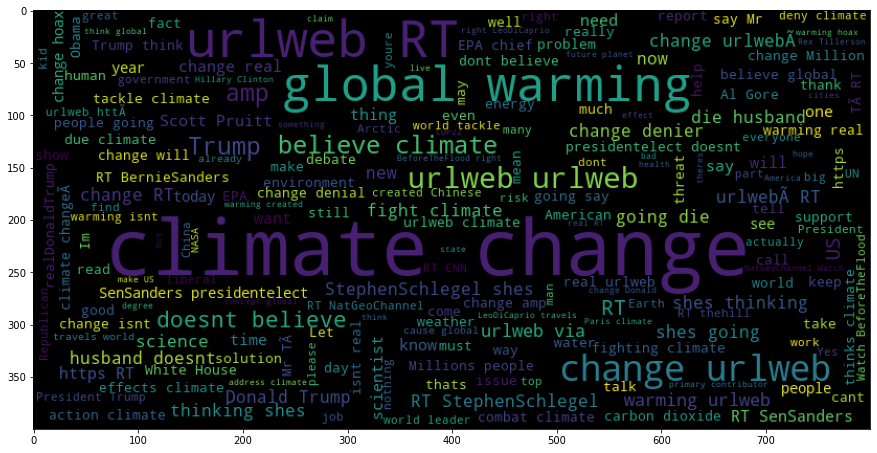

In [166]:
#Word Cloud Fig show the most frequent words on raw text.
from wordcloud import WordCloud 
allwords = ' '.join( [tweets for tweets in df_train_1['message']])
wordCloud = WordCloud(width=800, height=400,random_state=42).generate(allwords)
plt.figure( figsize=(15,10) )
plt.imshow(wordCloud)

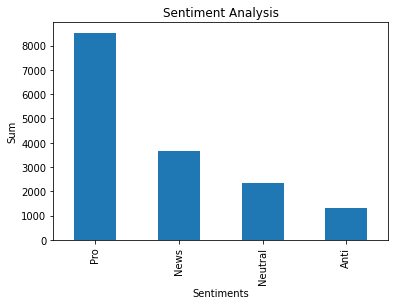

In [167]:
#Show the counts
df_train_1['Sentiment Label'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Sum')
df_train_1['Sentiment Label'].value_counts().plot(kind='bar')
plt.show()

**Model Selection on cleaned data**

In [195]:
#Train and test dataframes
X = df_train_1['message'] 
y = df_train_1['sentiment']

In [208]:
#Vectorize the words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X = vectorizer.fit_transform(df_train_1['message'])

In [197]:
#Splitting the data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

**Logistic Regression**

In [198]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

# Form a prediction set
predictions_lr = lr.predict(X_val)

# Print a classification report
print(classification_report(y_val, predictions_lr))

logistic_acc = accuracy_score (predictions_lr,y_val)


logistic_prec = precision_score (y_val,predictions_lr ,average='macro',)


logistic_rec = recall_score (y_val,predictions_lr ,average='weighted',)


logistic_f_score = f1_score (y_val,predictions_lr ,average='weighted',)

# Print the overall accuracy
print('The Logistic regression achieved an accuracy of '+ str(round(accuracy_score(y_val,predictions_lr)*100))+'% with its default unturned parameters')

              precision    recall  f1-score   support

        -1.0       0.92      0.24      0.38       428
         0.0       0.67      0.31      0.43       737
         1.0       0.71      0.93      0.81      2861
         2.0       0.80      0.70      0.74      1195

    accuracy                           0.73      5221
   macro avg       0.78      0.54      0.59      5221
weighted avg       0.74      0.73      0.70      5221

The Logistic regression achieved an accuracy of 73% with its default unturned parameters


**Linear SVC algorithm**

In [199]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

# Form a prediction set
predictions_lsvc = lsvc.predict(X_val)


metrics5 = classification_report(y_val, predictions_lsvc)

confusion4 = confusion_matrix(y_val, predictions_lsvc)

#experiment.log_confusion_matrix(labels=["News", "Pro", "Neutral","Anti"],matrix=confusion4)

# Print a classification report
print(classification_report(y_val, predictions_lsvc))

Linear_acc = accuracy_score (predictions_lsvc,y_val)


Linear_prec = precision_score (y_val,predictions_lsvc ,average='macro',)


Linear_rec = recall_score (y_val,predictions_lsvc ,average='weighted',)


Linear_f_score = f1_score (y_val,predictions_lsvc ,average='weighted',)


# Print the overall accuracy

print('The Linear SVC algorithm achieved an accuracy of '+ str(round(accuracy_score(y_val,predictions_lsvc)*100))+'% with its default unturned parameters')

              precision    recall  f1-score   support

        -1.0       0.80      0.46      0.59       428
         0.0       0.58      0.43      0.49       737
         1.0       0.77      0.86      0.81      2861
         2.0       0.74      0.75      0.75      1195

    accuracy                           0.74      5221
   macro avg       0.72      0.63      0.66      5221
weighted avg       0.74      0.74      0.73      5221

The Linear SVC algorithm achieved an accuracy of 74% with its default unturned parameters


**Model Selection on un-cleaned data**

In [200]:
#Train and test dataframes
X = df_train['message'] 
y = df_train['sentiment']

In [209]:
#Vectorize the words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X = vectorizer.fit_transform(df_train['message'])

In [202]:
#Splitting the data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

**Logistic Regression**

In [203]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

# Form a prediction set
predictions_lr = lr.predict(X_val)

# Print a classification report
print(classification_report(y_val, predictions_lr))

logistic_acc = accuracy_score (predictions_lr,y_val)


logistic_prec = precision_score (y_val,predictions_lr ,average='macro',)


logistic_rec = recall_score (y_val,predictions_lr ,average='weighted',)


logistic_f_score = f1_score (y_val,predictions_lr ,average='weighted',)

# Print the overall accuracy
print('The Logistic regression achieved an accuracy of '+ str(round(accuracy_score(y_val,predictions_lr)*100))+'% with its default unturned parameters')

              precision    recall  f1-score   support

          -1       0.87      0.24      0.38       428
           0       0.69      0.31      0.43       737
           1       0.71      0.93      0.81      2861
           2       0.80      0.70      0.75      1195

    accuracy                           0.73      5221
   macro avg       0.77      0.55      0.59      5221
weighted avg       0.74      0.73      0.70      5221

The Logistic regression achieved an accuracy of 73% with its default unturned parameters


**Linear SVC algorithm**

In [204]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

# Form a prediction set
predictions_lsvc = lsvc.predict(X_val)


metrics5 = classification_report(y_val, predictions_lsvc)

confusion4 = confusion_matrix(y_val, predictions_lsvc)

#experiment.log_confusion_matrix(labels=["News", "Pro", "Neutral","Anti"],matrix=confusion4)

# Print a classification report
print(classification_report(y_val, predictions_lsvc))

Linear_acc = accuracy_score (predictions_lsvc,y_val)


Linear_prec = precision_score (y_val,predictions_lsvc ,average='macro',)


Linear_rec = recall_score (y_val,predictions_lsvc ,average='weighted',)


Linear_f_score = f1_score (y_val,predictions_lsvc ,average='weighted',)


# Print the overall accuracy

print('The Linear SVC algorithm achieved an accuracy of '+ str(round(accuracy_score(y_val,predictions_lsvc)*100))+'% with its default unturned parameters')

              precision    recall  f1-score   support

          -1       0.78      0.47      0.59       428
           0       0.58      0.43      0.50       737
           1       0.77      0.87      0.81      2861
           2       0.76      0.75      0.76      1195

    accuracy                           0.75      5221
   macro avg       0.72      0.63      0.66      5221
weighted avg       0.74      0.75      0.74      5221

The Linear SVC algorithm achieved an accuracy of 75% with its default unturned parameters


## **Submission**

In [210]:
# getting our test set ready
X_test= test_df['message']
test_vect = vectorizer.transform(X_test)

# Making predictions on the datase and adding a sentiment column to our original test_df
#test_df['sentiment'] = lr.predict(X_test)

#creating an output csv for submission
#test_df[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)


In [211]:
y_pred = lsvc.predict(test_vect)


In [213]:
df_test['sentiment'] = y_pred


In [216]:
df_test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)
